* K-Means TODO
** Accuracy of clustering 2 overlapping Iris species
** Elongated (non-spherical) clusters
** 2 half-moons 
** Uniform data
** Unequal cluster size - 1 small spherical cluster with low variance, 1 large spherical cluster with high variance
** Unequal cluster size - Mickey mouse cluster (https://en.wikipedia.org/wiki/K-means_clustering#/media/File:ClusterAnalysis_Mouse.svg)

In [24]:
#----------
# Explore K-Means 
#----------

# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
from sklearn import datasets as d
from sklearn.cluster import k_means

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print 'sklearn version = {}'.format(sklearn.__version__)


sklearn version = 0.18


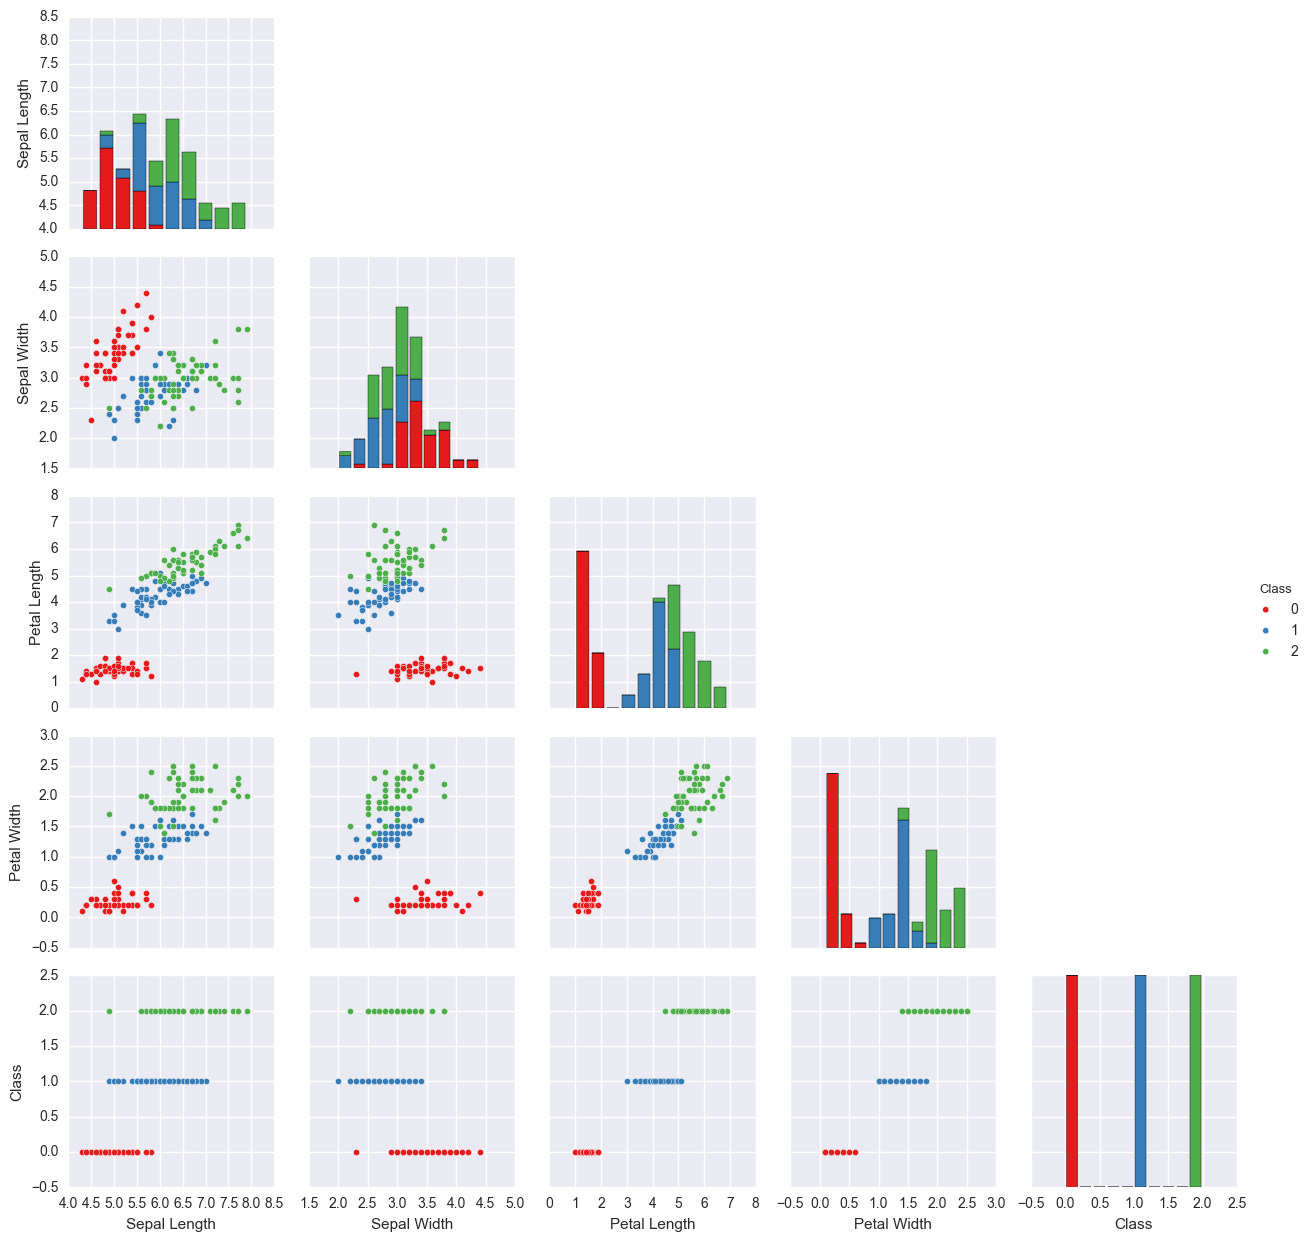

In [40]:
#----------

iris = d.load_iris()
X, y = iris.data, iris.target

dfx = pd.DataFrame(X)

df = pd.concat([dfx, pd.DataFrame(y)], axis=1)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

g = sns.pairplot(df, hue='Class', palette='Set1')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i,j].set_visible(False)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Pred Class
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


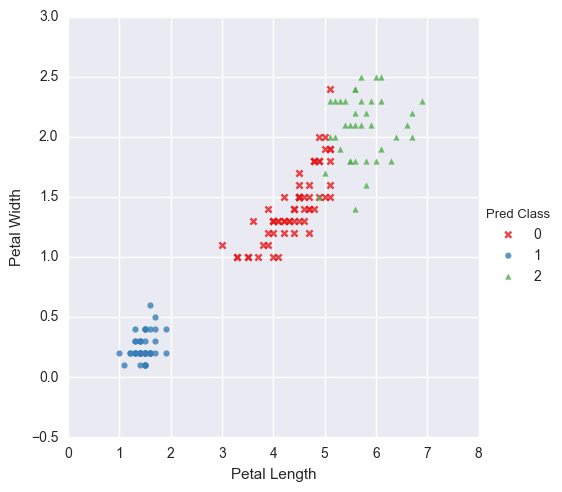

In [66]:
#----------

centroids, labels, inertia = k_means(X, n_clusters=3)
results = pd.concat([df, pd.DataFrame(labels)], axis=1)
results = results.rename(columns = {0:'Pred Class'})
results

sns.lmplot(x='Petal Length', y='Petal Width', data=results, hue='Pred Class', hue_order=[0,1,2],
           markers=['x','o','^'], palette='Set1', fit_reg=False)

